In [2]:
import os

# Define paths to the audio and image directories
audio_dir = "models/drum_samples/ds_256_256/model_step_40000/samples/audio/pregen_sch_ddpm_nisteps_1000"
image_dir = "models/drum_samples/ds_256_256/model_step_40000/samples/images/pregen_sch_ddpm_nisteps_1000"

# Get list of audio and image files
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Extract the indexes from the filenames (assuming format like 'audio_x.wav' and 'image_x.png')
audio_indexes = set(f.split('_')[1].split('.')[0] for f in audio_files)
image_indexes = set(f.split('_')[1].split('.')[0] for f in image_files)

# Find the common indexes (files that have both audio and image)
common_indexes = audio_indexes.intersection(image_indexes)

# Remove audio files without a matching image
for audio_file in audio_files:
    audio_index = audio_file.split('_')[1].split('.')[0]
    if audio_index not in common_indexes:
        os.remove(os.path.join(audio_dir, audio_file))
        print(f"Removed {audio_file} from audio directory")

# Remove image files without a matching audio
for image_file in image_files:
    image_index = image_file.split('_')[1].split('.')[0]
    if image_index not in common_indexes:
        os.remove(os.path.join(image_dir, image_file))
        print(f"Removed {image_file} from image directory")


Removed image_56.png from image directory
Removed image_251.png from image directory
Removed image_58.png from image directory
Removed image_199.png from image directory
Removed image_64.png from image directory
Removed image_110.png from image directory
Removed image_35.png from image directory
Removed image_181.png from image directory
Removed image_247.png from image directory
Removed image_91.png from image directory
Removed image_62.png from image directory
Removed image_172.png from image directory
Removed image_19.png from image directory
Removed image_17.png from image directory
Removed image_88.png from image directory
Removed image_25.png from image directory
Removed image_241.png from image directory
Removed image_151.png from image directory
Removed image_158.png from image directory
Removed image_164.png from image directory
Removed image_245.png from image directory
Removed image_152.png from image directory
Removed image_93.png from image directory
Removed image_205.png 

### Testing to filter out noisy/improper examples

In [35]:
import librosa
import numpy as np

def analyze_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # RMS
    rms = np.sqrt(np.mean(y**2))
    
    # Energy
    energy = np.sum(y**2)
    
    # Peak-to-Peak
    peak_to_peak = np.max(y) - np.min(y)
    
    # Spectral Features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y))
    
    # Zero-Crossing Rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))

    # Noise detection heuristics
    noise_threshold = 0.01  
    is_noisy = (energy < noise_threshold) or (spectral_flatness > 0.5) or (zero_crossing_rate > 0.1)

    return {
        "loudness": rms,
        "energy": energy,
        "peak_to_peak": peak_to_peak,
        "spectral_centroid": spectral_centroid,
        "spectral_flatness": spectral_flatness,
        "zero_crossing_rate": zero_crossing_rate,
        "is_noisy": is_noisy
    }

Analysis results for models/spotify_sleep_dataset/512_128/model_step_40000/samples/audio/pregen_sch_ddpm_nisteps_1000/audio_264.wav:
Loudness (RMS): 0.012019084766507149
Energy: 18.897470474243164
Peak to Peak: 0.1262359321117401
Spectral Centroid: 995.3495511029353
Spectral Flatness: 0.0007784368935972452
Zero-Crossing Rate: 0.04311561584472656
Is Noisy: False


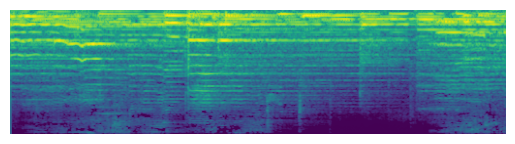

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Audio, display

# Example of using the function
index = 264
audio_file_path = f'models/spotify_sleep_dataset/512_128/model_step_40000/samples/audio/pregen_sch_ddpm_nisteps_1000/audio_{index}.wav'
image_file_path = f'models/spotify_sleep_dataset/512_128/model_step_40000/samples/images/pregen_sch_ddpm_nisteps_1000/image_{index}.png'  # Use the correct image extension

results = analyze_audio(audio_file_path)

print(f"Analysis results for {audio_file_path}:")
print(f"Loudness (RMS): {results['loudness']}")
print(f"Energy: {results['energy']}")
print(f"Peak to Peak: {results['peak_to_peak']}")
print(f"Spectral Centroid: {results['spectral_centroid']}")
print(f"Spectral Flatness: {results['spectral_flatness']}")
print(f"Zero-Crossing Rate: {results['zero_crossing_rate']}")
print(f"Is Noisy: {results['is_noisy']}")

img = mpimg.imread(image_file_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

display(Audio(audio_file_path, autoplay=False))